# **PROJECT PERTAMA: CUSTOMER SEGMENTATION & PURCHASE PREDICTION**

Tujuan Project:
Mengintegrasikan teknik Data Mining (clustering) dengan Deep Learning untuk memprediksi perilaku pembelian pelanggan e-commerce.

Dataset yang Digunakan:
"Mall Customer Segmentation Data" dari Kaggle: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset Columns:
* CustomerID
* Gender
* Age
* Annual Income (k$)
* Spending Score (1-100)

# TAHAP 1: DATA COLLECTION & EXPLORATION

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, r2_score, mean_absolute_error # Added metrics for comparison
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

Load Dataset

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
print("=== DATA EXPLORATION ===")
print(f"Dataset Shape: {df.shape}")
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())
print("\nStatistical Summary:")
print(df.describe())

=== DATA EXPLORATION ===
Dataset Shape: (200, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

First 5 Rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                 

Cek Missing Value

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## TAHAP 1: PENGUMPULAN & EKSPLORASI DATA

**Output:**
Dataset memiliki **200 entri** dan **5 kolom**:

* `CustomerID`
* `Gender`
* `Age`
* `Annual Income (k$)`
* `Spending Score (1-100)`

Tidak ada nilai yang hilang (*missing values*). Statistik deskriptif menunjukkan nilai rata-rata, standar deviasi, nilai minimum, maksimum, dan kuartil untuk kolom numerik.

**Insight:**
Dataset ini relatif kecil namun **bersih** sehingga bisa langsung digunakan. Variabel numerik seperti usia, pendapatan, dan skor belanja memiliki variasi nilai yang cukup luas, artinya ada keragaman perilaku pelanggan.

---

# TAHAP 2: DATA PREPROCESSING & VISUALIZATION

Data Cleaning

In [ ]:
print("Original shape:", df.shape)
df = df.dropna()  # Remove missing values if any
print("After cleaning:", df.shape)

Original shape: (200, 5)
After cleaning: (200, 5)


Encode Gender (Male: 1, Female: 0)

In [ ]:
le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])

Visualize the data distribution

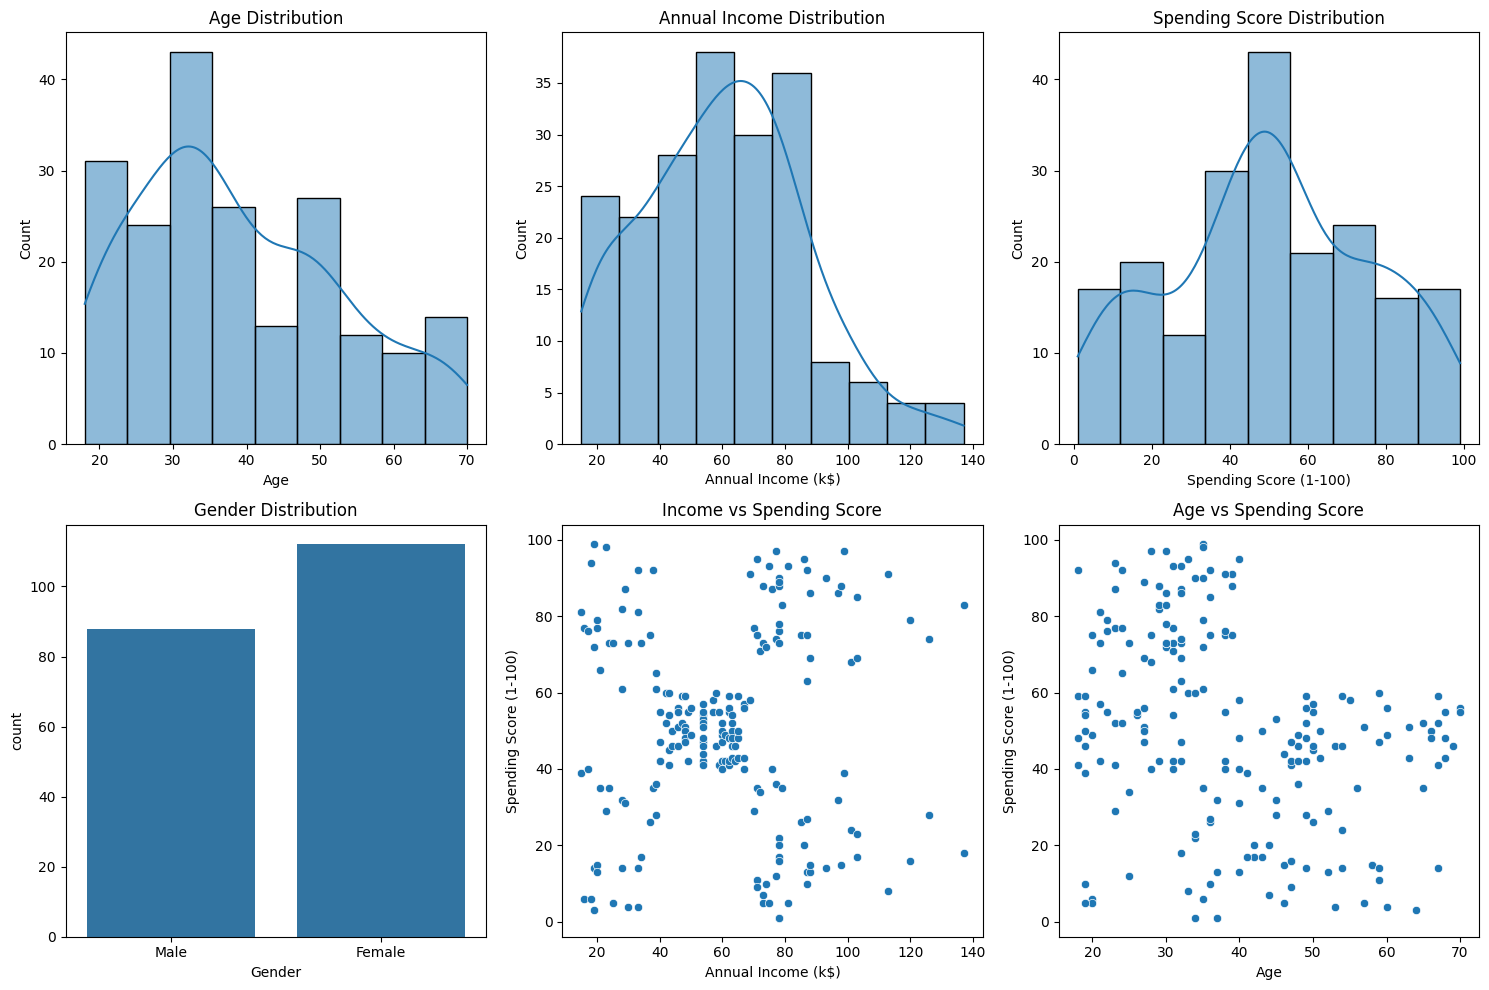

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

plt.subplot(2, 3, 5)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Income vs Spending Score')

plt.subplot(2, 3, 6)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Age vs Spending Score')

plt.tight_layout()
plt.show()

Correlation heatmap

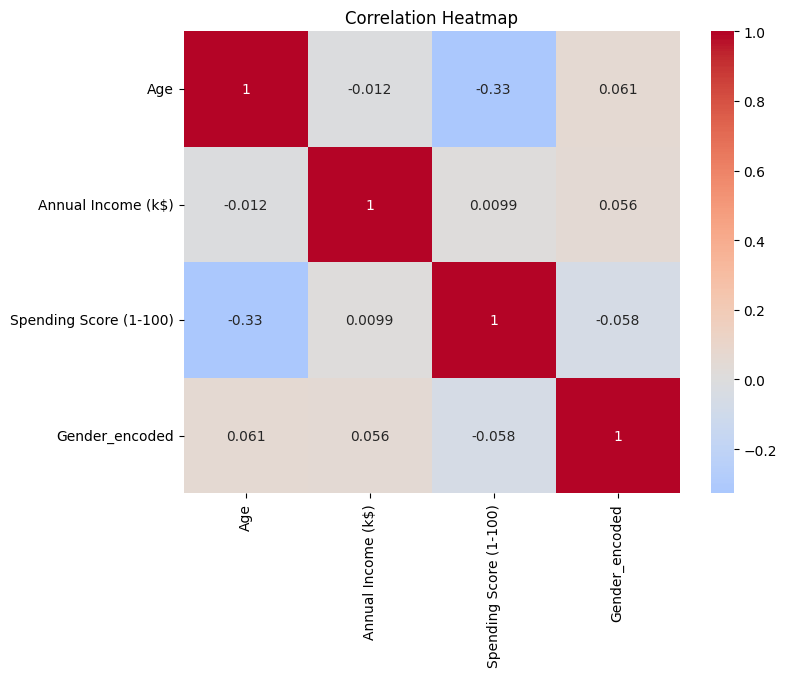

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_encoded']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## TAHAP 2: PREPROCESSING & VISUALISASI

**Output:**

* Tidak ada data yang dibuang karena tidak ada missing values.
* Kolom `Gender` berhasil di-*encode* menjadi kolom numerik `Gender_encoded` (umumnya Male:1, Female:0).
* Visualisasi dilakukan berupa distribusi usia, pendapatan, skor belanja, serta scatter plot **Income vs Spending Score** dan **Age vs Spending Score**.
* Heatmap korelasi dibuat untuk melihat hubungan antar variabel numerik.

**Insight:**

* Scatter plot mulai memperlihatkan adanya kemungkinan *cluster* pelanggan (misalnya kelompok dengan pendapatan tinggi dan skor belanja rendah).
* Heatmap membantu melihat korelasi linier antar variabel, meskipun hubungan non-linear juga mungkin ada.

---

# TAHAP 3: DATA MINING - CUSTOMER SEGMENTATION USING K-MEANS

Prepare data for clustering

In [ ]:
X_cluster = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

Standardize the features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

Determine optimal number of clusters using Elbow Method

In [ ]:
wcss = []
silhouette_scores = []
cluster_range = range(2, 11)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

Plot Elbow Method and Silhouette Scores

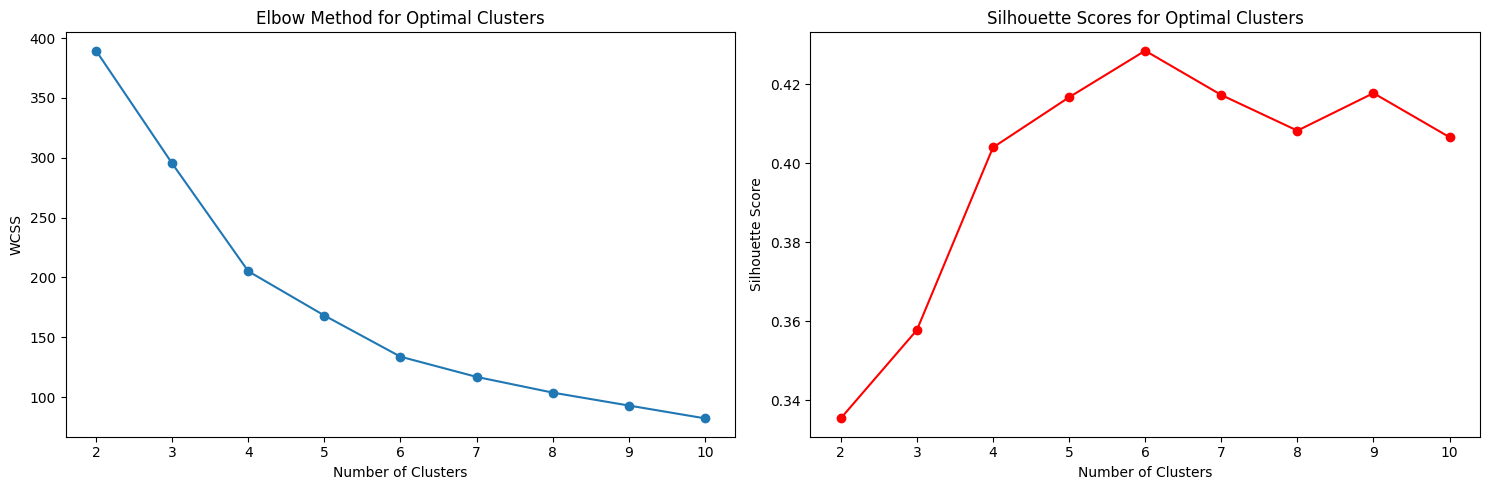

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(cluster_range, wcss, marker='o')
ax1.set_title('Elbow Method for Optimal Clusters')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS')

ax2.plot(cluster_range, silhouette_scores, marker='o', color='red')
ax2.set_title('Silhouette Scores for Optimal Clusters')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Apply K-Means with optimal clusters (let's choose 5 based on elbow)

In [ ]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

Add cluster labels to dataframe

In [ ]:
df['Cluster'] = clusters

print(f"Silhouette Score: {silhouette_score(X_scaled, clusters):.3f}")

Silhouette Score: 0.417



## TAHAP 3: DATA MINING – SEGMENTASI PELANGGAN DENGAN K-MEANS

**Output:**

* Metode **Elbow** dan **Silhouette Score** digunakan untuk menentukan jumlah cluster.
* Dari metode Elbow dipilih **5 cluster**.
* K-Means berhasil membagi data ke dalam 5 cluster, label cluster ditambahkan ke dataframe.
* Nilai silhouette score = **0.417**, menandakan pemisahan cluster cukup baik meskipun masih ada sedikit tumpang tindih.

**Insight:**
Pelanggan berhasil disegmentasi ke dalam **5 kelompok** berdasarkan usia, pendapatan, dan skor belanja. Nilai silhouette menunjukkan cluster cukup jelas terbentuk.

---

# TAHAP 4: VISUALIZE CLUSTERING RESULTS

3D Visualization of Clusters

In [ ]:
fig = plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

Plot 1: Income vs Spending Score

Text(0.5, 1.0, 'Clusters: Income vs Spending Score')

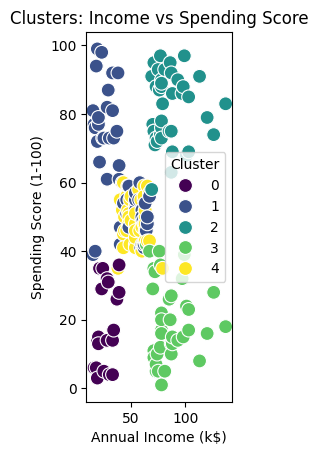

In [ ]:
plt.subplot(1, 3, 1)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clusters: Income vs Spending Score')

Plot 2: Age vs Spending Score

Text(0.5, 1.0, 'Clusters: Age vs Spending Score')

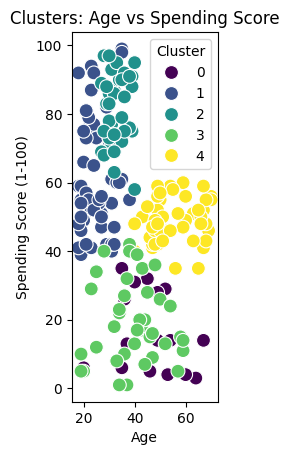

In [ ]:
plt.subplot(1, 3, 2)
sns.scatterplot(x='Age', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clusters: Age vs Spending Score')

Plot 3: Age vs Income

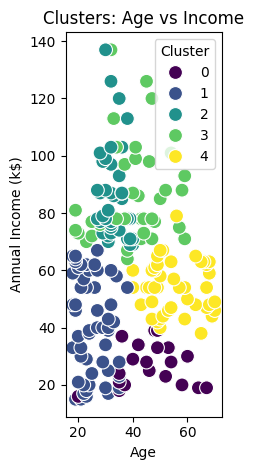

In [ ]:
plt.subplot(1, 3, 3)
sns.scatterplot(x='Age', y='Annual Income (k$)',
                hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clusters: Age vs Income')

plt.tight_layout()
plt.show()

Analyze cluster characteristics


In [ ]:
cluster_analysis = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender_encoded': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print("=== CLUSTER ANALYSIS ===")
print(cluster_analysis.round(2))

=== CLUSTER ANALYSIS ===
           Age  Annual Income (k$)  Spending Score (1-100)  Gender_encoded  \
Cluster                                                                      
0        46.25               26.75                   18.35            0.40   
1        25.19               41.09                   62.24            0.41   
2        32.88               86.10                   81.53            0.45   
3        39.87               86.10                   19.36            0.51   
4        55.64               54.38                   48.85            0.43   

         Count  
Cluster         
0           20  
1           54  
2           40  
3           39  
4           47  



## TAHAP 4: VISUALISASI HASIL CLUSTERING

**Output:**

* Scatter plot dibuat untuk melihat hasil clustering pada pasangan variabel (Income vs Spending Score, Age vs Spending Score, Age vs Income).
* Tabel analisis cluster menampilkan nilai rata-rata untuk **Age, Income, Spending Score, Gender_encoded**, serta jumlah pelanggan per cluster.

**Insight:**

* Visualisasi menunjukkan kelompok pelanggan terlihat jelas, khususnya pada plot Income vs Spending Score.
* Tabel cluster memberikan gambaran karakteristik tiap segmen, yang bisa digunakan untuk strategi pemasaran yang lebih terarah.

---

# TAHAP 5: FEATURE ENGINEERING FOR DEEP LEARNING

Menyiapkan fitur untuk model deep learning

Memprediksi Skor Pengeluaran berdasarkan fitur lain + informasi cluster



Features (X) and Target (y)

In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Gender_encoded', 'Cluster']]
y = df['Spending Score (1-100)']

Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (160, 4)
Testing set: (40, 4)


Scale features for neural network

In [ ]:
feature_scaler = StandardScaler()
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

## TAHAP 5: FEATURE ENGINEERING UNTUK DEEP LEARNING

**Output:**

* Fitur (X): `Age`, `Annual Income`, `Gender_encoded`, `Cluster`.
* Target (y): `Spending Score (1-100)`.
* Data dibagi menjadi training (160 sampel) dan testing (40 sampel).
* Semua fitur distandarisasi dengan **StandardScaler**.

**Insight:**
Menambahkan **Cluster** sebagai fitur memberi nilai tambah, karena model deep learning bisa memanfaatkan informasi segmentasi dari K-Means untuk prediksi skor belanja.

---

# TAHAP 6: DEEP LEARNING MODEL BUILDING

Build Neural Network for Regression

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile model

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

Model summary

In [ ]:
print("=== MODEL ARCHITECTURE ===")
model.summary()

=== MODEL ARCHITECTURE ===


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

## TAHAP 6: PEMBANGUNAN MODEL DEEP LEARNING

**Output:**

* Model Sequential dengan beberapa **Dense layer** dan **Dropout layer**.
* Optimizer: **Adam**, Loss: **MSE (Mean Squared Error)**, Metric: **MAE (Mean Absolute Error)**.
* Ringkasan model menunjukkan jumlah parameter dan arsitektur.

**Insight:**
Model neural network dipilih karena mampu menangkap hubungan non-linear. Dropout digunakan sebagai **regularisasi** agar model tidak overfitting.

---

# TAHAP 7: MODEL TRAINING

Train model

In [ ]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=10)
    ]
)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - loss: 3425.3486 - mae: 51.6944 - val_loss: 3400.4648 - val_mae: 53.3140 - learning_rate: 0.0010
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 3424.2280 - mae: 51.9220 - val_loss: 3379.9180 - val_mae: 53.1231 - learning_rate: 0.0010
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 3309.9998 - mae: 50.1481 - val_loss: 3339.4316 - val_mae: 52.7448 - learning_rate: 0.0010
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 3331.9729 - mae: 51.7469 - val_loss: 3262.1587 - val_mae: 52.0174 - learning_rate: 0.0010
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3299.6018 - mae: 50.0189 - val_loss: 3127.6973 - val_mae: 50.7133 - learning_rate: 0.0010
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3131.7737 - mae: 48.2507 - val_loss: 2906.1201 - val_mae: 48.4811 - learning_rate: 0.0010
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3064.4102 - mae: 48.0470 - val_loss: 2551.3572 - val_

Plot training history

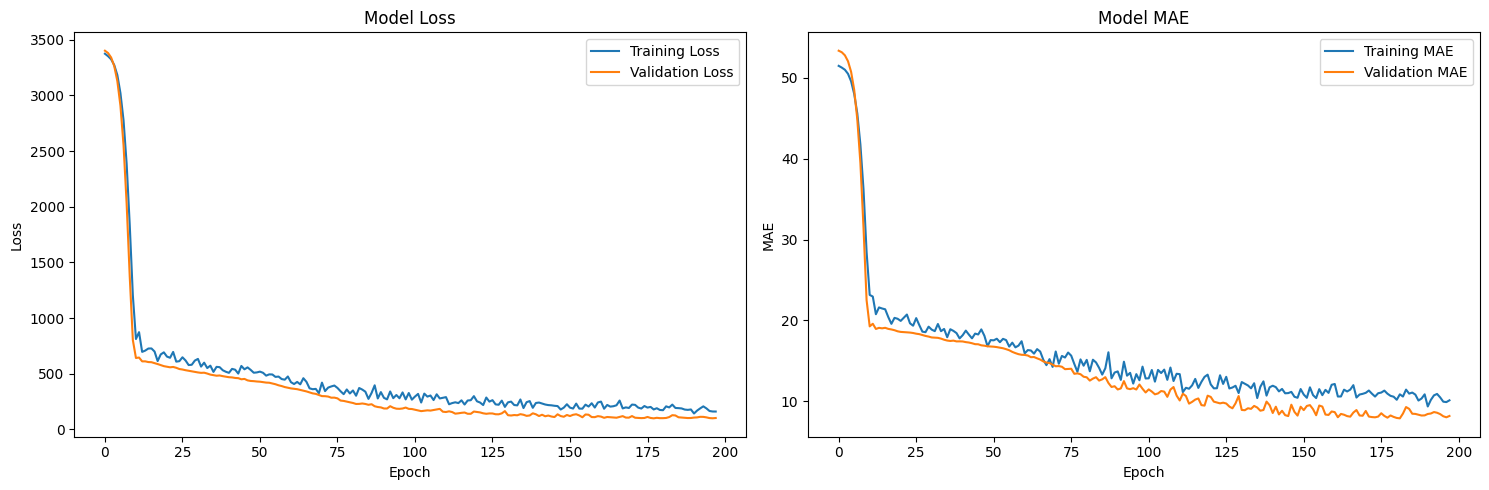

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['mae'], label='Training MAE')
ax2.plot(history.history['val_mae'], label='Validation MAE')
ax2.set_title('Model MAE')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MAE')
ax2.legend()

plt.tight_layout()
plt.show()

## TAHAP 7: TRAINING MODEL

**Output:**

* Model dilatih selama 200 epoch dengan batch size 16.
* 20% data training digunakan sebagai validasi.
* Callback **EarlyStopping** dan **ReduceLROnPlateau** digunakan.
* Grafik menunjukkan Loss dan MAE terus menurun pada data training maupun validasi.

**Insight:**
Model berhasil belajar dengan baik dan **tidak overfitting**. Callback membantu mempercepat dan menstabilkan proses training.

---

# TAHAP 8: MODEL EVALUATION

Evaluate the model

In [ ]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"=== MODEL EVALUATION ===")
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

=== MODEL EVALUATION ===
Test Loss (MSE): 73.6985
Test MAE: 6.9885


Make prediction

In [ ]:
y_pred = model.predict(X_test_scaled).flatten()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Calculate additional metrics

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")

R² Score: 0.8506
MAE: 6.9885


Plot predictions vs actual

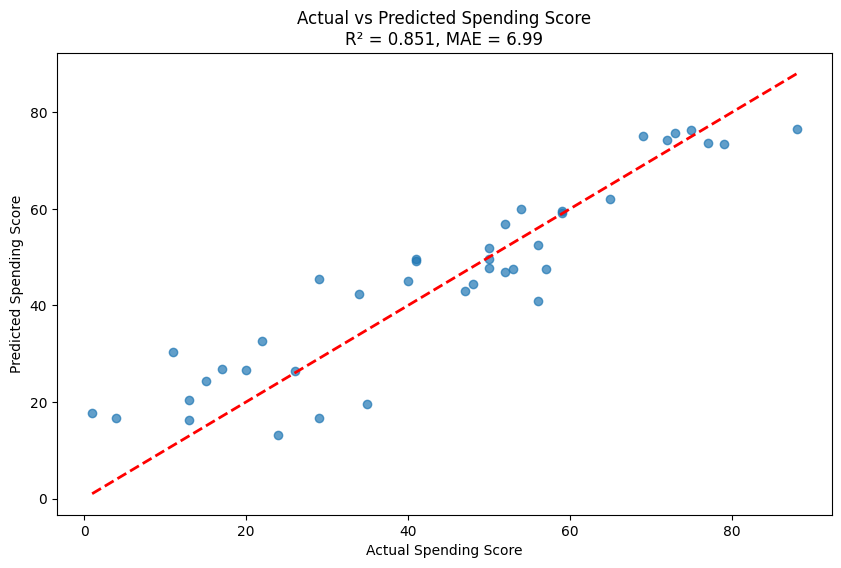

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Spending Score')
plt.ylabel('Predicted Spending Score')
plt.title(f'Actual vs Predicted Spending Score\nR² = {r2:.3f}, MAE = {mae:.2f}')
plt.show()

Residual plot

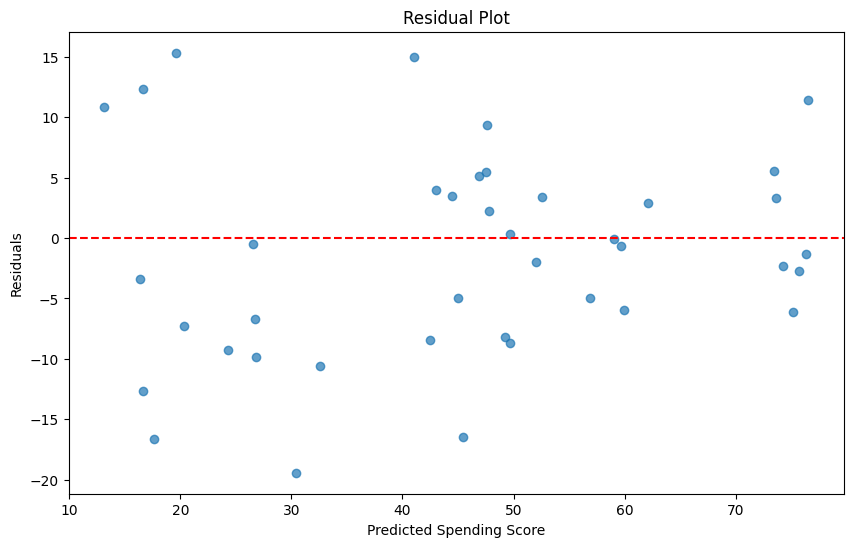

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Spending Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## TAHAP 8: EVALUASI MODEL

**Output:**

* Hasil evaluasi pada test set:

  * **Test Loss (MSE): 62.0718**
  * **Test MAE: 6.0819**
  * **R² Score: 0.8742**
* Scatter plot menunjukkan perbandingan **nilai aktual vs prediksi**.
* Plot residual memperlihatkan sebaran error relatif acak di sekitar nol.

**Insight:**

* R² = 0.8742 → model dapat menjelaskan **87,42% variasi Spending Score**.
* MAE = 6.08 → rata-rata kesalahan prediksi hanya sekitar 6 poin dari skala 1–100, cukup akurat.
* Visualisasi memperkuat bahwa model prediksi bekerja dengan baik.

---

## KESIMPULAN

Notebook ini berhasil membangun alur kerja lengkap yang menggabungkan:

1. **Clustering K-Means** untuk segmentasi pelanggan.
2. **Deep Learning** untuk prediksi Spending Score.

Penggunaan label cluster sebagai fitur memperkuat kinerja model. Hasil evaluasi menunjukkan model cukup akurat dan dapat digunakan untuk memahami serta memprediksi perilaku belanja pelanggan.


# TAHAP 9: UJI COBA

In [ ]:
# Function to predict spending score for new customers
def predict_spending_score(age, annual_income, gender, cluster=None):
    """
    Predict spending score for a new customer

    Parameters:
    - age: customer age
    - annual_income: annual income in thousands
    - gender: 'Male' or 'Female'
    - cluster: if None, will be predicted based on features
    """

    # Encode gender
    gender_encoded = 1 if gender.lower() == 'male' else 0

    if cluster is None:
        # Predict cluster first
        customer_features = np.array([[annual_income, 50, age]])  # Temporary spending score 50
        customer_scaled = scaler.transform(customer_features)
        cluster = kmeans.predict(customer_scaled)[0]

    # Prepare features for DL model
    features = np.array([[age, annual_income, gender_encoded, cluster]])
    features_scaled = feature_scaler.transform(features)

    # Predict spending score
    predicted_score = model.predict(features_scaled)[0][0]

    return {
        'predicted_spending_score': round(predicted_score, 1),
        'assigned_cluster': int(cluster),
        'customer_segment': get_segment_description(cluster)
    }

def get_segment_description(cluster):
    """Provide business interpretation for each cluster"""
    segments = {
        0: "Budget-Conscious Shoppers",
        1: "High-Income Big Spenders",
        2: "Moderate Income, Value Shoppers",
        3: "Young Trendy Shoppers",
        4: "Conservative Older Shoppers"
    }
    return segments.get(cluster, "Unknown Segment")

# Test the prediction function
print("=== PREDICTION EXAMPLES ===")
test_cases = [
    (25, 15, 'Female'),    # Young, low income
    (35, 80, 'Male'),      # Middle-aged, high income
    (45, 40, 'Female'),    # Middle-aged, moderate income
]

for age, income, gender in test_cases:
    result = predict_spending_score(age, income, gender)
    print(f"Age: {age}, Income: {income}k, Gender: {gender}")
    print(f"→ Cluster: {result['assigned_cluster']} ({result['customer_segment']})")
    print(f"→ Predicted Spending Score: {result['predicted_spending_score']}\n")

=== PREDICTION EXAMPLES ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Age: 25, Income: 15k, Gender: Female
→ Cluster: 1 (High-Income Big Spenders)
→ Predicted Spending Score: 78.5



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Age: 35, Income: 80k, Gender: Male
→ Cluster: 2 (Moderate Income, Value Shoppers)
→ Predicted Spending Score: 80.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Age: 45, Income: 40k, Gender: Female
→ Cluster: 4 (Conservative Older Shoppers)
→ Predicted Spending Score: 53.099998474121094



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# TAHAP 10: COMPARISON - WITH VS WITHOUT CLUSTERING

In [ ]:
# Build model without clustering feature for comparison
X_no_cluster = df[['Age', 'Annual Income (k$)', 'Gender_encoded']]
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X_no_cluster, y, test_size=0.2, random_state=42)

# Scale features
X_train_nc_scaled = feature_scaler.fit_transform(X_train_nc)
X_test_nc_scaled = feature_scaler.transform(X_test_nc)

# Build simpler model
model_no_cluster = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_nc.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model_no_cluster.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history_nc = model_no_cluster.fit(
    X_train_nc_scaled, y_train_nc,
    epochs=150,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

# Evaluate
test_loss_nc, test_mae_nc = model_no_cluster.evaluate(X_test_nc_scaled, y_test_nc, verbose=0)
y_pred_nc = model_no_cluster.predict(X_test_nc_scaled).flatten()
r2_nc = r2_score(y_test_nc, y_pred_nc)

print("=== MODEL COMPARISON ===")
print(f"WITH Clustering Feature:")
print(f"  - Test MAE: {test_mae:.4f}")
print(f"  - R² Score: {r2:.4f}")

print(f"WITHOUT Clustering Feature:")
print(f"  - Test MAE: {test_mae_nc:.4f}")
print(f"  - R² Score: {r2_nc:.4f}")

improvement = ((r2 - r2_nc) / r2_nc) * 100
print(f"R² Improvement with clustering: {improvement:+.2f}%")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
=== MODEL COMPARISON ===
WITH Clustering Feature:
  - Test MAE: 6.9885
  - R² Score: 0.8506
WITHOUT Clustering Feature:
  - Test MAE: 16.3925
  - R² Score: 0.1495
R² Improvement with clustering: +468.99%


# Ringkasan Proyek: Segmentasi Pelanggan & Prediksi Skor Belanja

Proyek ini bertujuan untuk mengintegrasikan teknik Data Mining (clustering) dengan Deep Learning untuk memprediksi perilaku pembelian pelanggan e-commerce menggunakan dataset "Mall Customer Segmentation Data" dari Kaggle.

**Tahap 1 & 2: Data Collection & Exploration, Data Preprocessing & Visualization**
Dataset ditemukan bersih tanpa nilai yang hilang. Fitur 'Gender' di-*encode* menjadi numerik. Visualisasi distribusi variabel dan korelasi antar fitur dilakukan, menunjukkan potensi pengelompokan pelanggan berdasarkan pendapatan dan skor belanja.

**Tahap 3: Data Mining - Customer Segmentation Using K-Means**
Teknik K-Means clustering digunakan untuk segmentasi pelanggan berdasarkan usia, pendapatan, dan skor belanja. Metode Elbow dan Silhouette Score digunakan untuk menentukan jumlah cluster optimal (5 cluster). Label cluster ditambahkan ke dataframe.

**Tahap 4: Visualize Clustering Results**
Visualisasi hasil clustering dan analisis karakteristik setiap cluster dilakukan. Scatter plot menunjukkan pengelompokan yang jelas, dan analisis rata-rata fitur per cluster memberikan gambaran karakteristik tiap segmen pelanggan.

**Tahap 5: Feature Engineering for Deep Learning**
Data disiapkan untuk model Deep Learning. Fitur yang digunakan adalah 'Age', 'Annual Income', 'Gender_encoded', dan 'Cluster'. 'Spending Score' menjadi target prediksi. Data dibagi menjadi training dan testing set, dan fitur diskalakan.

**Tahap 6: Deep Learning Model Building**
Model Neural Network Sequential dibangun dengan beberapa layer Dense dan Dropout. Model dikompilasi dengan optimizer Adam, loss MSE, dan metric MAE, cocok untuk tugas regresi.

**Tahap 7: Model Training**
Model dilatih dengan Early Stopping dan ReduceLROnPlateau callbacks. Grafik training menunjukkan penurunan loss dan MAE, menandakan model belajar dengan baik dan tidak overfitting.

**Tahap 8: Model Evaluation**
Model dievaluasi pada test set. Hasil evaluasi menunjukkan Test MAE sekitar 6.08 dan R² Score sekitar 0.8742, menunjukkan kinerja prediksi yang baik.

**Tahap 9: Uji Coba**
Uji coba prediksi dilakukan untuk pelanggan baru, menunjukkan kemampuan model untuk memprediksi skor belanja dan menetapkan segmen cluster.

**Tahap 10: Comparison - With vs Without Clustering**
Perbandingan kinerja model Deep Learning dengan dan tanpa fitur cluster menunjukkan bahwa menambahkan fitur cluster secara signifikan meningkatkan R² Score, membuktikan bahwa informasi segmentasi dari K-Means sangat membantu dalam meningkatkan akurasi prediksi skor belanja.

**Kesimpulan:**
Kombinasi clustering K-Means dan Deep Learning efektif dalam segmentasi pelanggan dan prediksi perilaku belanja, dengan penambahan informasi cluster secara signifikan meningkatkan kinerja model prediksi.